# DOMAIN: Smartphone, Electronics
    
• CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

• DATA DESCRIPTION:

• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

*Data source:
    
• PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively..


# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

• Merge the provided csvs into one dataframe

• Check a few observations and shape of the dataframe

• Round off scores to the nearest integers

• Check for missing values. Impute the missing values if there is any

• Check for duplicate values and remove them if there is any

• Keep only 1000000 data samples. Use random state=612

• Drop irrelevant features. Keep features like Author, Product, and Score

In [625]:
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


In [626]:
dfp1 = pd.read_csv("C:\\Users\\srivi\\Downloads\\R5 RS\\Dataset-20210112T043747Z-001\\Dataset\\phone_user_review_file_1.csv" , error_bad_lines=False, encoding="latin-1")
dfp2 = pd.read_csv("C:\\Users\\srivi\\Downloads\\R5 RS\\Dataset-20210112T043747Z-001\\Dataset\\phone_user_review_file_2.csv", error_bad_lines=False, encoding="latin-1")
dfp3 = pd.read_csv("C:\\Users\\srivi\\Downloads\\R5 RS\\Dataset-20210112T043747Z-001\\Dataset\\phone_user_review_file_3.csv", error_bad_lines=False, encoding="latin-1")
dfp5 = pd.read_csv("C:\\Users\\srivi\\Downloads\\R5 RS\\Dataset-20210112T043747Z-001\\Dataset\\phone_user_review_file_5.csv", error_bad_lines=False, encoding="latin-1")
dfp6 = pd.read_csv("C:\\Users\\srivi\\Downloads\\R5 RS\\Dataset-20210112T043747Z-001\\Dataset\\phone_user_review_file_6.csv", error_bad_lines=False, encoding="latin-1")

In [627]:
print(dfp1.columns.values)
print(dfp2.columns.values)
print(dfp3.columns.values)
print(dfp5.columns.values)
print(dfp6.columns.values)
print("Total # of records combined in all datasets - ", dfp1.shape[0] + dfp2.shape[0] + dfp3.shape[0] + dfp5.shape[0] + dfp6.shape[0])

['phone_url' 'date' 'lang' 'country' 'source' 'domain' 'score' 'score_max'
 'extract' 'author' 'product']
['phone_url' 'date' 'lang' 'country' 'source' 'domain' 'score' 'score_max'
 'extract' 'author' 'product']
['phone_url' 'date' 'lang' 'country' 'source' 'domain' 'score' 'score_max'
 'extract' 'author' 'product']
['phone_url' 'date' 'lang' 'country' 'source' 'domain' 'score' 'score_max'
 'extract' 'author' 'product']
['phone_url' 'date' 'lang' 'country' 'source' 'domain' 'score' 'score_max'
 'extract' 'author' 'product']
Total # of records combined in all datasets -  1316849


# Insight:
Since all the datasets have same columns, appending all the data frames to a single data frame.

In [628]:
df = dfp1.append(dfp2,ignore_index=True).append(dfp3,ignore_index=True).append(dfp5, ignore_index=True).append(dfp6, ignore_index=True)

In [629]:
df.sample(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
211716,/cellphones/blackberry-passport/,12/13/2014,en,us,Amazon,amazon.com,10.0,10.0,Probably the best Blackberry of ever. Just got...,gter1965,BlackBerry Passport Unlocked Phone - Retail Pa...
964921,/cellphones/blackberry-9700/,1/13/2012,ru,ru,Yandex,market.yandex.ru,2.0,10.0,ÐÑÐ¸ Ð¿ÐµÑÐ²Ð¾Ð¹ Ð¶Ðµ Ð²Ð¾Ð·Ð¼Ð¾Ð¶Ð½Ð¾ÑÑÐ...,unclestan,BlackBerry Bold 9700
87144,/cellphones/lg-v10/,1/14/2016,en,us,Amazon,amazon.com,8.0,10.0,I have been using it for 3 weeks. Great camera...,Amazon Customer,LG V10 H961N Factory Unlocked International Mo...
800619,/cellphones/samsung-galaxy-s-iii/,9/23/2014,de,de,Yopi,yopi.de,NaN,NaN,Handlung In dem Film geht es um ein Ehepaar mi...,miss_daisy414,Samsung Galaxy Express I8730
551700,/cellphones/huawei-ascend-g6/,12/27/2014,it,it,Amazon,amazon.it,4.0,10.0,il dispositivo pare concepito al contrario ......,Davide,"Huawei Ascend G6 Smartphone, 4 GB, Bianco"
23985,/cellphones/apple-iphone-6s-plus/,1/22/2016,it,it,Pixmania,pixmania.it,10.0,10.0,"consegna velocissima, articolo in perfette con...",Gessica,APPLE iPhone 6S Plus - 64 GB - 4G - Argento
392952,/cellphones/doogee-x5-max-pro/,9/13/2016,es,es,Amazon,amazon.es,4.0,10.0,"No estÃ¡ mal de prestaciones, funciona fluido,...",Luis Soto Manuel,Doogee X5 MAX PRO - Mejorado 2 GB de RAM + 16G...
635080,/cellphones/nokia-lumia-925/,12/13/2014,de,de,Amazon,amazon.de,8.0,10.0,Geschrieben wurde schon viel und ausfÃ¼hrlich ...,derdude1976,"Microsoft Nokia Lumia 925 Smartphone (11,4 cm ..."
1067730,/cellphones/acer-betouch-e130/,2/18/2012,ru,ru,Yandex,market.yandex.ru,10.0,10.0,ÐÐ¾Ð»Ð³Ð¾ Ð¼ÑÑÐ°Ð»Ð°ÑÑ Ñ ÑÑÐ¾Ð¹ Ð¼Ð¾Ð´...,nadeewa.elena,Acer beTouch E130
390876,/cellphones/google-pixel/,1/14/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I traded in a Note 4 and wanted the Pixel XL b...,clipwell,"Google Pixel, Phone by Google"


In [630]:
df.shape

(1316849, 11)

# Insight:

After appending to a single data frame the # of records match the record count of all data sets combined together.

There ate 1316849 records and 11 features

In [631]:
df[df.duplicated()==True]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,9.6,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,9.6,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,9.6,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
1299848,/cellphones/nokia-8850/,8/31/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÑÐ¾ÑÑÐ¾ Ð¾ÑÐ»Ð¸ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½, ...",NaN,Nokia 8850
1299850,/cellphones/nokia-8850/,6/25/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÐ° ÑÐ²Ð¾Ð¸ Ð´ÐµÐ½ÑÐ³Ð¸, 1000 Ð´Ð¾Ð»Ð»Ð°ÑÐ...",NaN,Nokia 8850
1311923,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,NaN,NaN,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
1313176,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [632]:
df.drop_duplicates(keep='first',inplace=True)

In [633]:
df.shape

(1311253, 11)

# Insight:

There are 5596 duplicate records, removing from the data frame. Now there are 1311253 records.

In [634]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        58579
score_max    58579
extract      17629
author       56341
product          1
dtype: int64

In [635]:
df.dropna(subset = ['author','product'], inplace=True)

In [636]:
df.shape

(1254912, 11)

In [637]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        56088
score_max    56088
extract      14241
author           0
product          0
dtype: int64

# Insight:
    
Dropped 56342 nan (author,product) records from the dataframe, now the dataframe holds 1254912 records.

In [638]:
df[df['author']=='unknown']

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
14726,/cellphones/samsung-galaxy-s7-edge/,5/9/2017,nl,nl,Bol.com,bol.com,10.0,10.0,Goed product. Goede prijs kwaliteit verhouding...,unknown,Samsung Samsung Galaxy A5 2016 - Wit
14755,/cellphones/samsung-galaxy-s7-edge/,5/3/2017,nl,nl,Bol.com,bol.com,10.0,10.0,Ik ben zeer tevreden met mijn aanschaf van de ...,unknown,Samsung Samsung Galaxy A5 2016 - Wit
14756,/cellphones/samsung-galaxy-s7-edge/,5/3/2017,nl,be,Vandenborre,vandenborre.be,10.0,10.0,Voldoet volledig aan mijn verwachting voor een...,unknown,SAMSUNG GALAXY S7 EDGE BLACK
14757,/cellphones/samsung-galaxy-s7-edge/,5/3/2017,nl,nl,Bol.com,bol.com,10.0,10.0,"mooie telefoon, helder beeld veel mogelijkhede...",unknown,Samsung Samsung Galaxy S7 edge - 32GB - Roze
14763,/cellphones/samsung-galaxy-s7-edge/,5/2/2017,nl,nl,Bol.com,bol.com,8.0,10.0,Deze mobiel doet alles wat ik ervan verwacht. ...,unknown,Samsung Samsung Galaxy A5 2016 - Wit
...,...,...,...,...,...,...,...,...,...,...,...
1228466,/cellphones/samsung-sync-sgh-a707/,12/30/2007,en,us,Phone Arena,phonearena.com,2.6,10.0,this phone has had alot of issues with overhea...,unknown,Samsung Sync
1244774,/cellphones/motorola-sidekick-slide/,12/2/2007,en,us,Amazon,amazon.com,10.0,10.0,This was brand new like they said and there ha...,unknown,Motorola T-Mobile Motorola sidekick Q700 - SLI...
1247866,/cellphones/lg-cu400-cu405/,12/30/2007,en,us,Phone Arena,phonearena.com,2.0,10.0,this phone drops calls everywhere nothing but ...,unknown,LG CU400 / CU405
1293274,/cellphones/samsung-sgh-d415msatmb/,7/24/2005,en,us,Phone Arena,phonearena.com,5.8,10.0,"I guess this phone is good, yeah it doesnt hav...",unknown,Samsung SGH-D415


In [639]:
len(df["author"].unique())

755271

In [640]:
df_p = df.sample(n=1000000,random_state=612)

In [641]:
df_p.shape

(1000000, 11)

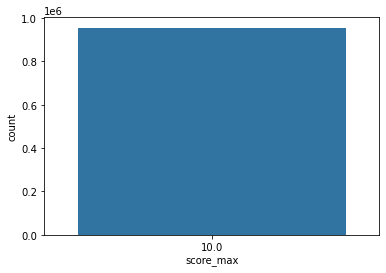

In [642]:
sns.countplot(x="score_max", data=df_p)

In [643]:
df_ph = df_p.drop(labels=['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'extract', 'score_max'], axis=1)

In [644]:
df_ph.columns.values

array(['score', 'author', 'product'], dtype=object)

# Insight:

Dropped all irrelevent features from dataframe.

Dropped score_max as all the records have same values

Reduced the sample size to 1000000

In [645]:
df_ph.isnull().sum()

score      44759
author         0
product        0
dtype: int64

In [646]:
df_ph['score'].replace(to_replace= np.nan, value=0, inplace=True)

In [647]:
df_ph.isnull().sum()

score      0
author     0
product    0
dtype: int64

In [648]:
df_ph['score'] = df_ph['score'].round(0)

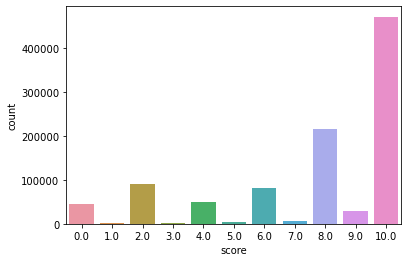

In [649]:
sns.countplot(x="score", data=df_ph)

# Insight:

Rounded off the score to integer values. 

Replaced nan values in score to 0 as it will be predicted later by recommendation system alg

There are no null values in user and item.

# 2. Answer the following questions

• Identify the most rated features

• Identify the users with most number of reviews

• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset.

In [650]:
df_ph.groupby('product')['score'].mean().sort_values(ascending=False).head(10)  

product
Nokia 6282                                                                  10.0
HTC ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ HTC One E8 dual sim                   10.0
HUAWEI - Smartphone P9 Lite blanc                                           10.0
HUAWEI ASCEND P9 LITE PINK                                                  10.0
Samsung S5570i Galaxy                                                       10.0
Samsung S5570 Galaxy Mini on O2 Pay As You Go with ÃÂ£10 airtime credit    10.0
HUAWEI Ascend G610 (White)                                                  10.0
HUAWEI Ascend G620s white Android Smartphone                                10.0
Samsung S5560 Player 5 Rose - TÃ©lÃ©phone Mobile                            10.0
HUAWEI Ascend G7 - 4G - negro - Smartphone                                  10.0
Name: score, dtype: float64

# Insight:

Grouped by product and calculating the mean of score (rating) and sorting the records in descending order will give top rated products. Here showing only 10 products

In [651]:
#df_ph.groupby('author')['score'].count().sort_values(ascending=False).head(10)

In [652]:
df_ph['is_user_rated'] = np.where(df_ph['score']==0,0,1)

In [653]:
df_ph.sample(10)

,score,author,product,is_user_rated
1209277,10.0,jetaudio77,enV VX-9900,1
1146531,4.0,Der Fanta,Samsung SGH-L700 silber Handy,1
787570,4.0,Graham,"Nokia Lumia 920, 32Gb, Sim Free Windows Smartp...",1
41306,10.0,Robbie76,"Apple iPhone 6s, 32Gb - Rose Gold",1
889962,2.0,Shar,Apple iPhone 4 16GB (Black) - AT&T,1
976187,6.0,wilde Nico,"Samsung Galaxy Xcover oranje, zwart - Overzicht",1
209289,6.0,Kiran,"Asus Zenfone Selfie ZD551KL (Tiffany Blue, 32GB)",1
1176985,10.0,34da5187,NOKIA 8800 ARTE CEP TELEFONU,1
739119,2.0,Lyuben Krassini,"Huawei Ascend Y300 Smartphone (10,2 cm (4,0 Zo...",1
1076289,6.0,Jeannette D,"Nokia 6350 Phone, Red (AT&T)",1


In [654]:
df_ph.groupby('author')['is_user_rated'].sum().sort_values(ascending=False).head(10)

author
Amazon Customer    59293
Cliente Amazon     15172
e-bit               6607
Client d'Amazon     6020
Amazon Kunde        3725
Anonymous           2084
einer Kundin        2057
einem Kunden        1541
unknown             1379
Anonymous           1113
Name: is_user_rated, dtype: int32

# Insight:
First adding a column - is_user_rated and imputing 1 if the score is > 0 else 1.
Grouping the user and calculating the sum of is_user_rated column and sorting the values based on the count in descending gives the users with most # of reviews. Showing the first 10 records.

In [655]:
lu= pd.DataFrame(df_ph.groupby('author')['is_user_rated'].sum())
luu = (lu>50).index.tolist()

li = pd.DataFrame(df_ph.groupby('product')['is_user_rated'].sum())
lii = (li>50).index.tolist()

df_u_i = df_ph[df_ph['author'].isin(luu)]
df_u_i2 = df_ph[df_ph['product'].isin(lii)]

In [656]:
df_u_i.head()

,score,author,product,is_user_rated
1194682,10.0,Konstantin,Motorola MOTOROKER E8 Unlocked Phone with 2 GB...,1
710804,10.0,ancipe,"Samsung I9082 Galaxy Grand Smartphone, 8 GB, D...",1
968359,10.0,Lynne Mckeag,Nokia C3-00 Sim Free Mobile Phone - Dark Grey,1
292813,10.0,Cliente Amazon,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,1
618541,8.0,camouflagemoney,HTC One S - gradient blue (T-Mobile),1


In [657]:
df_u_i2.head()

,score,author,product,is_user_rated
1194682,10.0,Konstantin,Motorola MOTOROKER E8 Unlocked Phone with 2 GB...,1
710804,10.0,ancipe,"Samsung I9082 Galaxy Grand Smartphone, 8 GB, D...",1
968359,10.0,Lynne Mckeag,Nokia C3-00 Sim Free Mobile Phone - Dark Grey,1
292813,10.0,Cliente Amazon,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,1
618541,8.0,camouflagemoney,HTC One S - gradient blue (T-Mobile),1


In [658]:
df_u_i.append(df_u_i2)
df_u_i.drop_duplicates(keep='first',inplace=True)

In [659]:
df_u_i.shape

(909150, 4)

# Insight:
    
Grouped by user and produt who has rating count > 50.

Extrated the rows of authors from list to data frame and extrated rows from product list to another data frame.

Merged the two data frame and removed duplicates to get the data with products having more than 50 ratings and users who have given more than 50 ratings

In [660]:
#lu = df_ph.groupby('author')
#li = df_ph.groupby('product')

#lu.get_group('Amazon Customer')['score'].count()
#li.get_group('Nokia 6282')['score'].count()

#for i in lu.index:
#    print(i,lu[i])

#li=df_ph.groupby('product')['score'].count().sort_values(ascending=False).head(10)

#x= 'Lenovo Vibe K4 Note (White,16GB)'
#for i in li.index:
#    print(i,li[i])
#if li[x] > 4323:
#    print('yes')

#df_u_i_50 = df_ph[ lu[x['author']] > 50 or li[x['product']]] > 50,df_ph)

#df_u_i_50 = pd.DataFrame(columns=df_ph.columns)
#for i,row in df_ph.iterrows():
    #print(row)
    #print(df_ph.loc[i]['author'])
#    if lu.get_group(df_ph.loc[i]['author'])['score'].count() > 50 or li.get_group(df_ph.loc[i]['product'])['score'].count() > 50:
#        df_u_i_50.append(row)

#df_u_i_50n = df_ph[lu.get_group(df_ph['author'])['score'].count() > 50 or li.get_group(df_ph['product'])['score'].count() > 50]

#df_u_i_50.head()

#df_u_i = pd.DataFrame(df_ph.groupby('product')['is_user_rated'].sum())

#df_u_i.columns.values

#prod = df_u_i.sort_values(by='is_user_rated', ascending=False).apply(df_u_i['is_user_rated']>50)

# 3. Build a popularity based model and recommend top 5 mobile phones

In [661]:
score_mean_count['score_counts'] = pd.DataFrame(df_ph.groupby('product')['is_user_rated'].sum())  

In [662]:
score_mean_count['score_counts_multiplied'] = pd.DataFrame(score_mean_count['score']*score_mean_count['score_counts'])

In [663]:
score_mean_count.head()

,score,score_counts,score_counts_multiplied
product,,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.000000,1,8.0
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1,10.0
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1,10.0
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.000000,1,6.0
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.210526,38,274.0


In [664]:
score_mean_count.sort_values(by='score_counts_multiplied', ascending=False).head(5)

,score,score_counts,score_counts_multiplied
product,,,
"Lenovo Vibe K4 Note (White,16GB)",7.199134,4158,29934.0
"OnePlus 3 (Graphite, 64 GB)",8.753686,3256,28502.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.210162,3464,24976.0
"OnePlus 3 (Soft Gold, 64 GB)",8.526020,2844,24248.0
Huawei P8lite zwart / 16 GB,8.456819,2119,17920.0


# Insight:

Counted the ratings for each user and multiplied with score. 

Now sorted the records based on the multiplied value to get the most popular product 

# 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 10000 samples if you face memory issues). ( 5 points)

In [665]:
reader = Reader(rating_scale=(1, 10))

In [666]:
data = Dataset.load_from_df(df_ph[['author', 'product', 'score']], reader)

In [667]:
data

In [668]:
trainset, testset = train_test_split(data, test_size=.25,random_state=100)
trainset

In [669]:
data.df

,author,product,score
1194682,Konstantin,Motorola MOTOROKER E8 Unlocked Phone with 2 GB...,10.0
710804,ancipe,"Samsung I9082 Galaxy Grand Smartphone, 8 GB, D...",10.0
968359,Lynne Mckeag,Nokia C3-00 Sim Free Mobile Phone - Dark Grey,10.0
292813,Cliente Amazon,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...,10.0
618541,camouflagemoney,HTC One S - gradient blue (T-Mobile),8.0
...,...,...,...
593019,UK Berlin,SONY Xperia M4 Aqua Dual - 16 GB - 4G - Korall...,10.0
647379,antonpavlov1984,LG Nexus 4 16Gb,10.0
768600,Christopher Taylor,Sony Phones Xperia T James Bond UK Sim Free Sm...,4.0
459819,Sally,"MICROSOFT Lumia 650 - 16 GB, Black",9.0


In [670]:
svd_model = SVD(n_factors=50, random_state=10)
svd_model.fit(trainset)

# 5. Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model ( 5 points)

In [671]:
df_ph2 = df_ph.sample(n=10000,random_state=612)
data2 = Dataset.load_from_df(df_ph2[['author', 'product', 'score']], reader)

In [672]:
trainsetu, testsetu = train_test_split(data2, test_size=.25,random_state=100)
algou = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
algou.fit(trainsetu)


Computing the cosine similarity matrix...
Done computing similarity matrix.


C:\Users\srivi\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


In [673]:
# get a prediction for specific users and items.
#pred = algo.predict(uid, iid, verbose=True)

In [674]:
trainseti, testseti = train_test_split(data2, test_size=.25,random_state=100)
algoi = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algoi.fit(trainseti)


Computing the cosine similarity matrix...
Done computing similarity matrix.


# 6. Evaluate the collaborative model. Print RMSE value. ( 2.5 points)

In [675]:
accuracy.rmse(test_pred)

RMSE: 2.6157


2.615685019044431

In [676]:
accuracy.rmse(test_predu, verbose=True)

RMSE: 3.0477


3.0477228826210436

In [677]:
accuracy.rmse(test_predi, verbose=True)

RMSE: 3.0685


3.068488370421595

# 7. Predict score (average rating) for test users. ( 2.5 points)

In [678]:
test_pred = svd_model.test(testset)
test_predu = algou.test(testsetu)
test_predi = algoi.test(testseti)

# 8. Report your findings and inferences ( 5 points)

# Insight:

The dataset has more general users. It can be more specific than amazon users or anonymous or unknown users.

Here we can do very much personalized recommendation. we need to request and get even more better data for the algorithm to do correct custom recomendation.

The algorithm also gave poor performance. The RMSE value is high for model based , user-user and item-tem collaborative filtering models.

# 9. Try and recommend top 5 products for test users. ( 5 points)

In [680]:
#testset_new = trainset.build_anti_testset()
predictions = svd_model.test(testset)
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,uid,iid,r_ui,est,details
0,ÐÐ¾Ð±Ð°Ð½Ð¾Ð²Ð° ÐÐ°ÑÑÐµÐ½ÐºÐ°,Alcatel OneTouch IDOL X 6040,10.0,8.198868,{'was_impossible': False}
1,JasonThomas,HTC One,8.0,7.846409,{'was_impossible': False}
2,Sebas23,Samsung Galaxy S7 edge 32GB (Verizon),10.0,9.315394,{'was_impossible': False}
3,stefna,DOOGEE VALENCIA2 Y100 Pro 5.0 Pollici HD Dello...,8.0,8.542727,{'was_impossible': False}
4,brannume,LG Chocolate,2.0,5.490190,{'was_impossible': False}


In [681]:
def get_recomm(userID,n):
    recomm = predictions_df[predictions_df['uid']==userID][['uid','iid','est']].sort_values(by='est',ascending=False).head(n)  
    return recomm


In [682]:
get_recomm('Konstantin',4)

,uid,iid,est
94717,Konstantin,HTC Desire S,8.530234
52347,Konstantin,ASUS Computer ZenFone5 A501CG-1G358GER Smartph...,8.457191
104498,Konstantin,"LG G4 US991 32GB Smartphone (Unlocked, Black L...",8.449357


# 10. Check for outliers and impute them as required.

# 11. Try cross validation techniques to get better results.

In [589]:
param_grid = {'n_factors': [10, 25, 50, 75, 100, 150, 200],
'lr_all': [0.1, 0.01 ,0.5, 0.05, 1.0, 0.001, 0.005]}
svd = SVD()
#mse = make_scorer('mean_squared_error',greater_is_better=False)
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv=5)

gs.fit(data)

In [590]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.608219736795645
{'n_factors': 10, 'lr_all': 0.005}


In [613]:
#svd = SVD(n_factors=40)
algoi1 = KNNWithMeans(k=100, sim_options={'name': 'cosine', 'user_based': True})
cross_validate(algoi1, data2, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.1209  2.9766  3.0402  2.9802  3.0463  3.0329  0.0528  
MAE (testset)     2.4668  2.3716  2.4162  2.3854  2.4153  2.4110  0.0328  
Fit time          1.19    1.21    1.22    1.23    1.24    1.22    0.02    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([3.12091616, 2.976602  , 3.0401732 , 2.98024669, 3.04632965]),
 'test_mae': array([2.46678948, 2.37155665, 2.41616427, 2.38544342, 2.41526649]),
 'fit_time': (1.1888201236724854,
  1.213041067123413,
  1.216799259185791,
  1.2266931533813477,
  1.2371690273284912),
 'test_time': (0.02393651008605957,
  0.020939350128173828,
  0.022938966751098633,
  0.02097153663635254,
  0.022938966751098633)}

In [614]:
algoi2 = KNNWithMeans(k=100, sim_options={'name': 'cosine', 'user_based': False})
cross_validate(algoi1, data2, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.0376  2.9815  3.0483  3.0418  3.0705  3.0359  0.0295  
MAE (testset)     2.4141  2.4126  2.4028  2.4234  2.4202  2.4146  0.0071  
Fit time          1.22    1.23    1.23    1.23    1.21    1.22    0.01    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([3.03755202, 2.98153124, 3.04833604, 3.04175364, 3.07054269]),
 'test_mae': array([2.41414969, 2.41262494, 2.40280456, 2.42337278, 2.42017862]),
 'fit_time': (1.2242650985717773,
  1.2279300689697266,
  1.2302148342132568,
  1.228193998336792,
  1.2126314640045166),
 'test_time': (0.022938251495361328,
  0.022939443588256836,
  0.02289605140686035,
  0.021941661834716797,
  0.023966312408447266)}

# Insight:

Cross validation and gridsearchCV didnt give any better results than basic models as the data itself is not good as mentioned before.

The same result was obtained or mayb be a very little improvement ie RMSE was little bit low than raw models.

# 12. In what business scenario you should use popularity based Recommendation Systems?

# Insight:

Popularity based model can be used when user visit a ecommerce websites like amazon, ebay or online streaming websites like netflix, amazon prime etc for the first time, then we can recommennd some popularity products to the users.

Or if the user just visits the websites without loggin in, we can recomments popularity items to the users.

Popularity based model works with current trend. Trend setting or choosing features are upto the developers choice.

# 13. In what business scenario you should use CF based Recommendation Systems?

# Insight:

Collaborative filtering can be used when we want to do customised recommendations to users based on users personal interest.

Finding the nearest similar users and recommending products based on those users.

# 14. What other possible methods can you think of which can further improve the recommendation for different users?

# Insight:

Classification model based - uses features of both products as well as users in order to predict whether user will like a product or not.

naive based recommendation - conditional probability. eq frequently bought together in amazon 

content based recomendation - recomending items based on users past history of likes

hybrid based approach - combination of two or more recomendation strategies

association rule mining - finding rules how the products are bought together 

Here we can use hybrid approach of combining two or more recomendation system to recommend product to users as it make give users with more choice of recomended selection